The objective of this notebook is to apply the methods for clustering found with the original dataset to the duplicates one. The methods we are using are the same as with the big dataset, since in our understading is better to have consistency between datasets.

In [1]:
# Jupyter notebook: optional formatting extension
# %load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import datetime
import math
from math import ceil

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor

# Clustering evaluation
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score

# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Stats
from scipy.stats import chi2_contingency, stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.mosaicplot import mosaic

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Model selection
from sklearn.model_selection import GridSearchCV

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import matplotlib.cm as cm


In [2]:
FlightsDB_1 = pd.read_csv('FlightsDB_1.csv')
FlightsDB_2 = pd.read_csv('FlightsDB_2.csv')

In [3]:
# show flightsDB_1 ordering by Loyalty#
FlightsDB_1.sort_values(by=['Loyalty#'])


,Unnamed: 0,Loyalty#,PointsRedeemedRatio,FlightsWithCompanionsRatio,AvgDistancePerFlight,KMPerRedeemedPoint,UnredeemedPoints,LoyaltyIndex,HasBonus,AvgMonthlyFlights,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled,Time on Program,Loyalty#_new
0,0,101902,0.182369,0.176966,2131.451124,54.850123,62023,641.786822,0,5.741935,...,0.0,Married,Aurora,2020-01-07,0,6265.34,Standard,N,723 days,101902_1
1,1,106001,0.395167,0.241814,2039.651889,25.313924,48960,614.250737,0,5.591549,...,14973.0,Divorced,Star,2015-07-16,0,12168.74,Standard,N,2359 days,106001_1
2,2,114414,0.034855,0.205776,2782.755957,286.978183,74377,836.420101,0,3.957143,...,0.0,Married,Nova,2015-11-06,0,3591.07,Standard,N,2246 days,114414_1
3,3,130331,0.202501,0.426230,2851.959016,49.395088,27741,856.686753,0,2.595745,...,64640.0,Divorced,Nova,2019-12-01,0,2862.73,Standard,N,760 days,130331_1
4,4,135421,0.141525,0.328947,2590.785197,70.674686,67598,779.148786,0,4.676923,...,0.0,Divorced,Star,2017-12-16,0,5304.54,Standard,N,1475 days,135421_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,120,981508,0.174918,0.357143,2145.008929,57.186622,19816,644.550709,0,2.488889,...,44784.0,Married,Aurora,2018-04-01,0,5786.49,Standard,N,1369 days,981508_1
121,121,988392,0.407019,0.165116,2445.227907,24.575155,62333,736.113013,0,6.056338,...,0.0,Single,Aurora,2015-05-15,0,9022.08,Standard,N,2421 days,988392_1
122,122,989528,0.000000,0.223529,2096.891176,0.000000,35639,630.455108,0,3.469388,...,83772.0,Divorced,Star,2015-04-01,0,2453.41,Standard,N,2465 days,989528_1
123,123,990512,0.000000,0.351351,3142.621622,0.000000,11625,943.156486,0,0.925000,...,0.0,Single,Star,2018-10-21,0,1904.00,Standard,N,1166 days,990512_1


In [4]:
FlightsDB_1=FlightsDB_1.drop(columns=['Gender', 'Loyalty#_new', 'Longitude', 'Latitude', 'First Name', 'Last Name', 'Unnamed: 0', 'Customer Name', 'Country', 'City', 'Gender'])
FlightsDB_2=FlightsDB_2.drop(columns=['Gender', 'Loyalty#_new', 'Longitude', 'Latitude', 'First Name', 'Last Name', 'Unnamed: 0', 'Customer Name', 'Country', 'City', 'Gender'])

In [5]:
FlightsDB_1.columns

Index(['Loyalty#', 'PointsRedeemedRatio', 'FlightsWithCompanionsRatio',
       'AvgDistancePerFlight', 'KMPerRedeemedPoint', 'UnredeemedPoints',
       'LoyaltyIndex', 'HasBonus', 'AvgMonthlyFlights', 'sr_jan', 'sr_feb',
       'sr_mar', 'sr_apr', 'sr_may', 'sr_jun', 'sr_jul', 'sr_aug', 'sr_sep',
       'sr_oct', 'sr_nov', 'sr_dec', 'Province or State', 'Postal code',
       'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType', 'Cancelled',
       'Time on Program'],
      dtype='object')

In [6]:
FlightsDB_1=FlightsDB_1.drop(columns='Postal code')
FlightsDB_2=FlightsDB_2.drop(columns='Postal code')


In [7]:
FlightsDB_1.columns

Index(['Loyalty#', 'PointsRedeemedRatio', 'FlightsWithCompanionsRatio',
       'AvgDistancePerFlight', 'KMPerRedeemedPoint', 'UnredeemedPoints',
       'LoyaltyIndex', 'HasBonus', 'AvgMonthlyFlights', 'sr_jan', 'sr_feb',
       'sr_mar', 'sr_apr', 'sr_may', 'sr_jun', 'sr_jul', 'sr_aug', 'sr_sep',
       'sr_oct', 'sr_nov', 'sr_dec', 'Province or State', 'Education',
       'Location Code', 'Income', 'Marital Status', 'LoyaltyStatus',
       'EnrollmentDateOpening', 'CancellationDate', 'Customer Lifetime Value',
       'EnrollmentType', 'Cancelled', 'Time on Program'],
      dtype='object')

In [8]:
FlightsDB_1=FlightsDB_1.drop(columns='Location Code')
FlightsDB_2=FlightsDB_2.drop(columns='Location Code')

In [9]:

# Convert EnrollmentDateOpening to datetime if not already
FlightsDB_1['EnrollmentDateOpening'] = pd.to_datetime(FlightsDB_1['EnrollmentDateOpening'])
FlightsDB_2['EnrollmentDateOpening'] = pd.to_datetime(FlightsDB_2['EnrollmentDateOpening'])

# Extract month and create EnrollmentMonth
FlightsDB_1['EnrollmentMonth'] = FlightsDB_1['EnrollmentDateOpening'].dt.month
FlightsDB_2['EnrollmentMonth'] = FlightsDB_2['EnrollmentDateOpening'].dt.month


In [10]:
# Remove the " days" text and convert to integer
FlightsDB_1['Time on Program'] = FlightsDB_1['Time on Program'].str.replace(' days', '').astype(int)
FlightsDB_2['Time on Program'] = FlightsDB_2['Time on Program'].str.replace(' days', '').astype(int)

# Create Reenroll column: 1 if Time on Program < 0 else 0
FlightsDB_1['Reenroll'] = FlightsDB_1['Time on Program'].apply(lambda x: 1 if x < 0 else 0)
FlightsDB_2['Reenroll'] = FlightsDB_2['Time on Program'].apply(lambda x: 1 if x < 0 else 0)

print(FlightsDB_1)
print(FlightsDB_2)


     Loyalty#  PointsRedeemedRatio  FlightsWithCompanionsRatio  \
0      101902             0.182369                    0.176966   
1      106001             0.395167                    0.241814   
2      114414             0.034855                    0.205776   
3      130331             0.202501                    0.426230   
4      135421             0.141525                    0.328947   
..        ...                  ...                         ...   
120    981508             0.174918                    0.357143   
121    988392             0.407019                    0.165116   
122    989528             0.000000                    0.223529   
123    990512             0.000000                    0.351351   
124    992168             0.266319                    0.231198   

     AvgDistancePerFlight  KMPerRedeemedPoint  UnredeemedPoints  LoyaltyIndex  \
0             2131.451124           54.850123             62023    641.786822   
1             2039.651889           25.313924

In [14]:
import pandas as pd
import numpy as np

# Convert to datetime safely
FlightsDB_1['EnrollmentDateOpening'] = pd.to_datetime(FlightsDB_1['EnrollmentDateOpening'], errors='coerce')
FlightsDB_1['CancellationDate'] = pd.to_datetime(FlightsDB_1['CancellationDate'], errors='coerce')

FlightsDB_2['EnrollmentDateOpening'] = pd.to_datetime(FlightsDB_2['EnrollmentDateOpening'], errors='coerce')
FlightsDB_2['CancellationDate'] = pd.to_datetime(FlightsDB_2['CancellationDate'], errors='coerce')

# For Reenrolled customers, set CancellationDate to NaT
FlightsDB_1.loc[FlightsDB_1['Reenroll'] == 1, 'CancellationDate'] = pd.NaT
FlightsDB_2.loc[FlightsDB_2['Reenroll'] == 1, 'CancellationDate'] = pd.NaT

# Calculate max enrollment date (ignoring NaT)
max_date_1 = FlightsDB_1['EnrollmentDateOpening'].max()
max_date_2 = FlightsDB_2['EnrollmentDateOpening'].max()

# Compute Time on Program in days
FlightsDB_1['Time on Program'] = (FlightsDB_1['CancellationDate'].fillna(max_date_1) - FlightsDB_1['EnrollmentDateOpening']).dt.days
FlightsDB_2['Time on Program'] = (FlightsDB_2['CancellationDate'].fillna(max_date_2) - FlightsDB_2['EnrollmentDateOpening']).dt.days


## Loyalty Perspective

In [19]:
features = ['LoyaltyIndex','Time on Program', 'HasBonus', 'EnrollmentMonth']
loyalty_clustering1 = FlightsDB_1[features]
loyalty_clustering1.head()

loyalty_clustering2 = FlightsDB_2[features]
loyalty_clustering2.head()

,LoyaltyIndex,Time on Program,HasBonus,EnrollmentMonth
0,641.786822,624,0,3
1,614.250737,2153,0,1
2,836.420101,2177,0,12
3,856.686753,309,0,1
4,779.148786,696,0,1


  Cluster 0: 35 customers
  Cluster 1: 33 customers
  Cluster 2: 23 customers
  Cluster 3: 34 customers


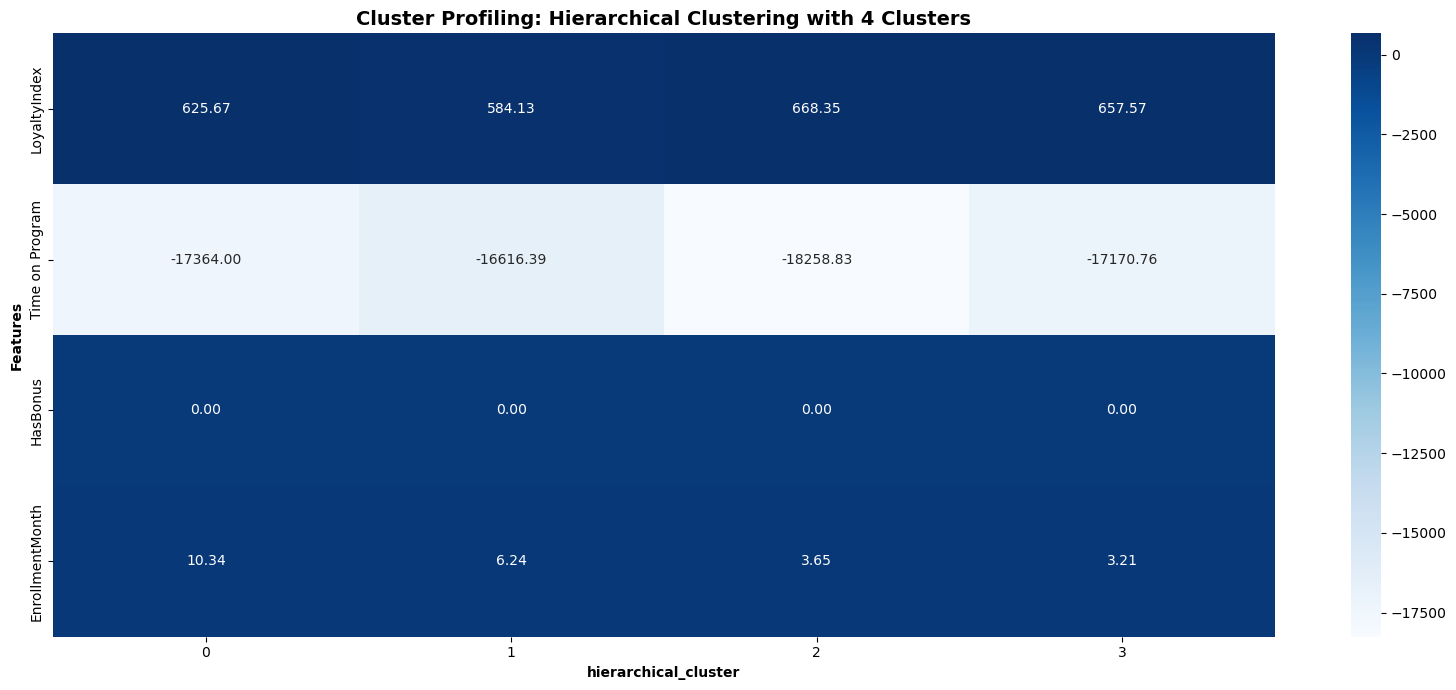

  Cluster 0: 28 customers
  Cluster 1: 42 customers
  Cluster 2: 14 customers
  Cluster 3: 41 customers


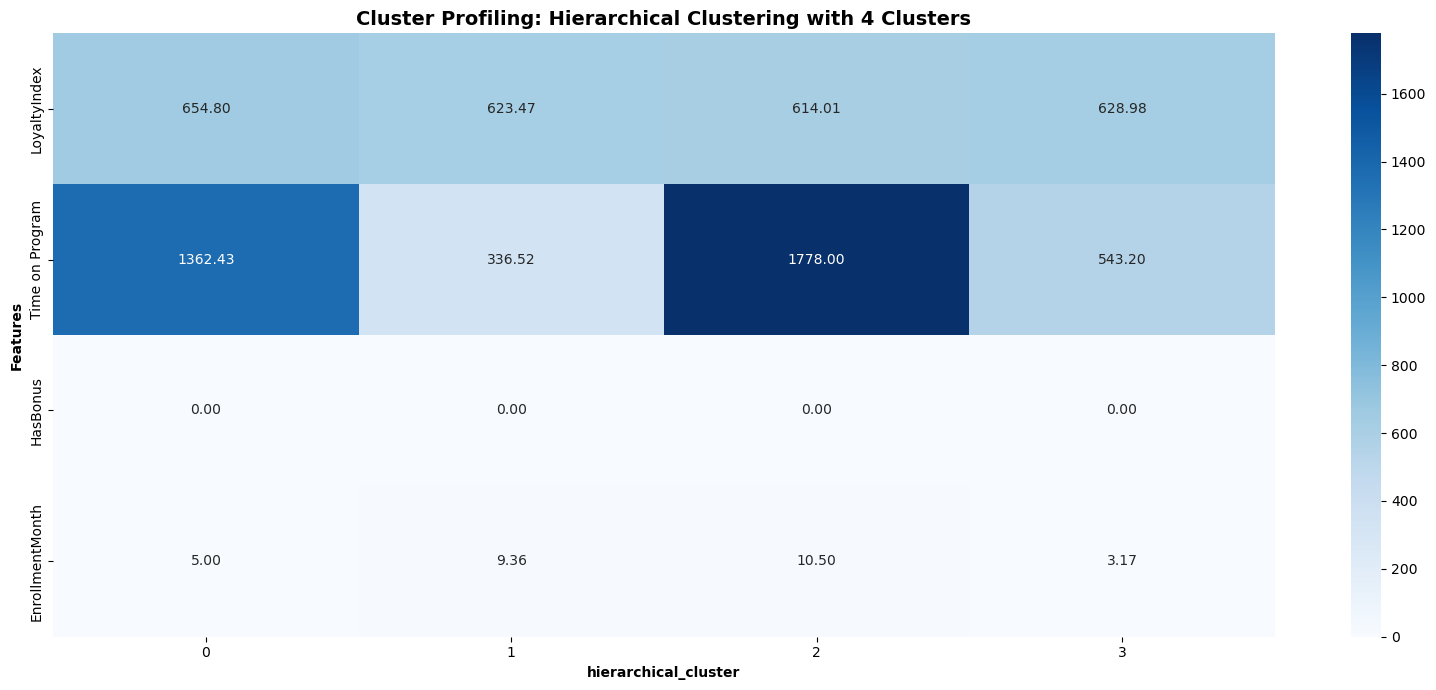

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

def hierarchical_clustering_profiling(df, n_clusters=4):
    # Normalize numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64',  'int32']).columns.tolist()
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # Perform hierarchical clustering
    hr = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward", metric="euclidean")
    hr_labels = hr.fit_predict(df_normalized)
    df_normalized['hierarchical_cluster'] = hr_labels

    # Print cluster counts
    for i in range(n_clusters):
        print(f"  Cluster {i}: {np.sum(hr_labels == i):,} customers")

    # Inverse transform to original scale
    df_original_scale = pd.DataFrame(
        scaler.inverse_transform(df_normalized[numerical_columns]),
        columns=numerical_columns,
        index=df_normalized.index
    )
    df_original_scale['hierarchical_cluster'] = hr_labels

    # Cluster profiling (mean per cluster)
    cluster_profile = df_original_scale.groupby('hierarchical_cluster')[numerical_columns].mean()

    # Heatmap
    plt.figure(figsize=(16, 7))
    sns.heatmap(cluster_profile.T, cmap="Blues", annot=True, fmt=".2f")
    plt.title(f"Cluster Profiling: Hierarchical Clustering with {n_clusters} Clusters", 
              fontweight='bold', fontsize=14)
    plt.xlabel("hierarchical_cluster", fontweight='bold')
    plt.ylabel("Features", fontweight='bold')
    plt.tight_layout()
    plt.show()

    return df_normalized, cluster_profile

# Apply to both loyalty datasets
loyalty_clustering1_normalized, cluster_profile1 = hierarchical_clustering_profiling(loyalty_clustering1, n_clusters=4)
loyalty_clustering2_normalized, cluster_profile2 = hierarchical_clustering_profiling(loyalty_clustering2, n_clusters=4)


## Value Based perspective

Total VIP outliers detected: 5
Core customers for clustering: 120


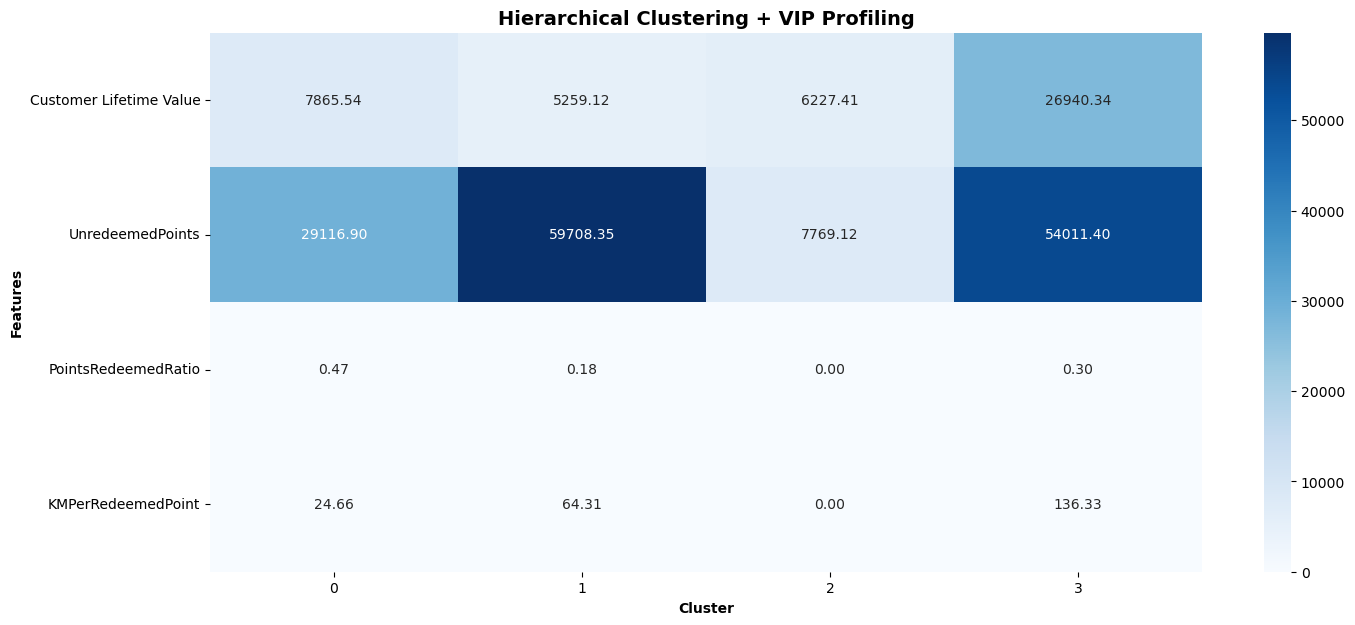

Total VIP outliers detected: 4
Core customers for clustering: 121


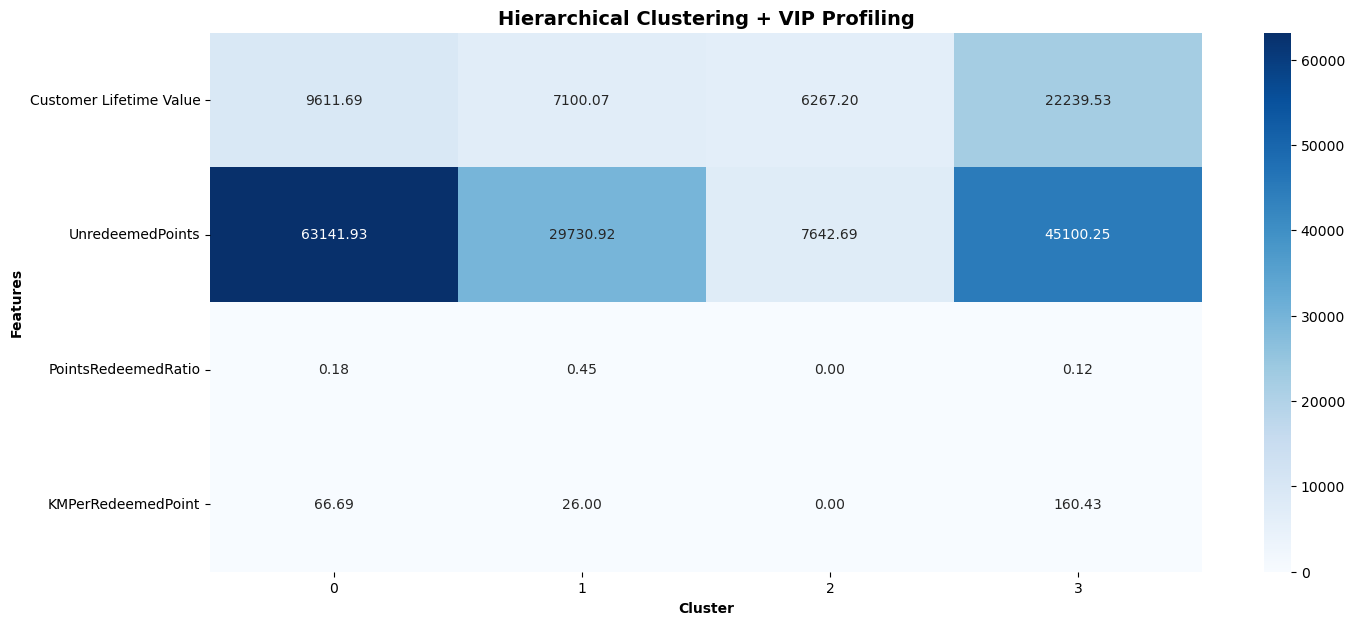

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Define value features
# -----------------------------
value_features = [
    'Customer Lifetime Value',
    'UnredeemedPoints',
    'PointsRedeemedRatio',
    'KMPerRedeemedPoint'
]

# -----------------------------
# Step 2: Standardize features
# -----------------------------
def standardize_features(df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    return df_scaled, scaler

# -----------------------------
# Step 3: DBSCAN to detect VIP outliers
# -----------------------------
def detect_vip_outliers(df, features, eps=2.0, min_samples=20):
    df_scaled, scaler = standardize_features(df, features)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    labels = dbscan.fit_predict(df_scaled)
    
    # VIP = outliers
    df_vip = df[labels == -1].copy()
    df_core = df[labels != -1].copy()
    
    print(f"Total VIP outliers detected: {len(df_vip)}")
    print(f"Core customers for clustering: {len(df_core)}")
    
    return df_core, df_vip, scaler

# -----------------------------
# Step 4: Hierarchical clustering on core customers
# -----------------------------
def hierarchical_clustering(df_core, features, n_clusters=3):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_core[features])
    
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
    hc_labels = hc.fit_predict(df_scaled)
    
    df_core['hierarchical_cluster'] = hc_labels
    return df_core, scaler

# -----------------------------
# Step 5: Combine core + VIPs and profile clusters
# -----------------------------
def cluster_profiling(df_core, df_vip, features):
    # Assign VIP cluster label (e.g., cluster n_clusters)
    vip_label = df_core['hierarchical_cluster'].max() + 1
    df_vip['hierarchical_cluster'] = vip_label
    
    # Combine
    df_all = pd.concat([df_core, df_vip], ignore_index=True)
    
    # Calculate cluster profile
    cluster_profile = df_all.groupby('hierarchical_cluster')[features].mean()
    
    # Heatmap
    plt.figure(figsize=(16, 7))
    sns.heatmap(cluster_profile.T, annot=True, fmt=".2f", cmap='Blues')
    plt.title("Hierarchical Clustering + VIP Profiling", fontweight='bold', fontsize=14)
    plt.xlabel("Cluster", fontweight='bold')
    plt.ylabel("Features", fontweight='bold')
    plt.show()
    
    return df_all, cluster_profile


# FlightsDB_1
core1, vip1, scaler1 = detect_vip_outliers(FlightsDB_1, value_features)
core1, hc_scaler1 = hierarchical_clustering(core1, value_features, n_clusters=3)
df1_all, profile1 = cluster_profiling(core1, vip1, value_features)

# FlightsDB_2
core2, vip2, scaler2 = detect_vip_outliers(FlightsDB_2, value_features)
core2, hc_scaler2 = hierarchical_clustering(core2, value_features, n_clusters=3)
df2_all, profile2 = cluster_profiling(core2, vip2, value_features)

# df1_all and df2_all now contain:
# - hierarchical_cluster: 0,1,2 for normal clusters, and 3 for VIP outliers
# - Full profiling ready in profile1 and profile2


## Seasonal Perspective

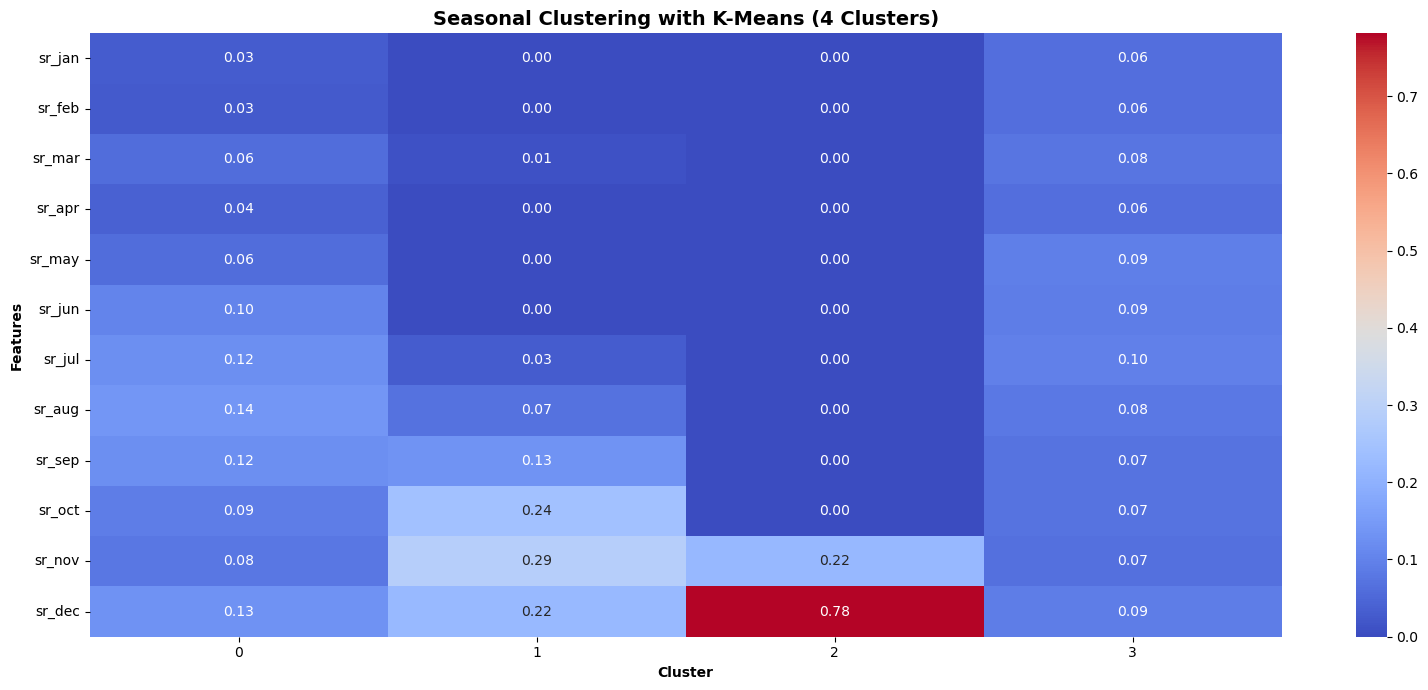

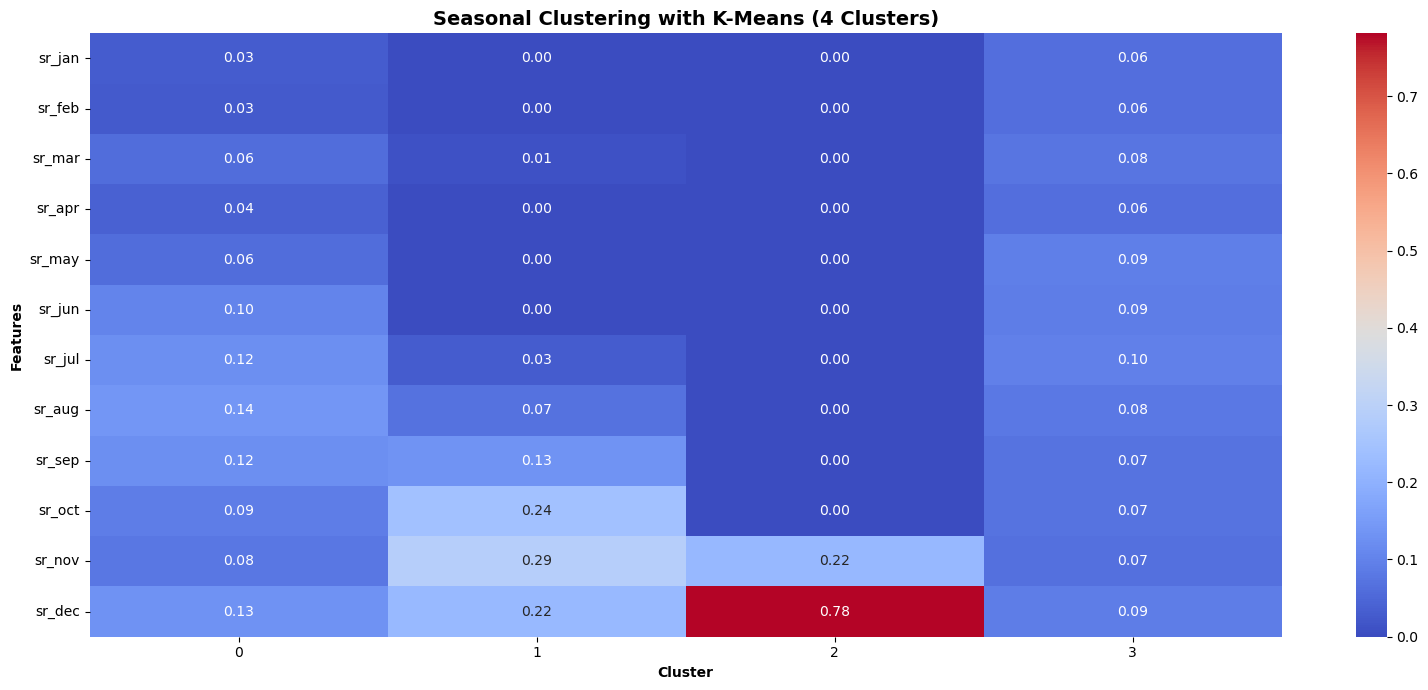

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Select seasonal features
# -----------------------------
def seasonal_features(df):
    sr_features = [col for col in df.columns if col.startswith('sr_')]
    return df[sr_features].copy(), sr_features

# -----------------------------
# Step 2: Standardize features
# -----------------------------
def standardize_features(df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    return df_scaled, scaler

# -----------------------------
# Step 3: Apply K-Means clustering
# -----------------------------
def kmeans_seasonal_clustering(df, features, n_clusters=4):
    df_features = df[features].copy()
    df_scaled, scaler = standardize_features(df, features)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    
    df['seasonal_cluster'] = kmeans_labels
    
    # Cluster profiling
    cluster_profile = df.groupby('seasonal_cluster')[features].mean()
    
    # Heatmap
    plt.figure(figsize=(16, 7))
    sns.heatmap(cluster_profile.T, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Seasonal Clustering with K-Means (4 Clusters)", fontweight='bold', fontsize=14)
    plt.xlabel("Cluster", fontweight='bold')
    plt.ylabel("Features", fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return df, cluster_profile

# -----------------------------
# Step 4: Apply workflow to both datasets
# -----------------------------
# FlightsDB_1
df1_sr, sr_features1 = seasonal_features(FlightsDB_1)
FlightsDB_1, seasonal_profile1 = kmeans_seasonal_clustering(FlightsDB_1, sr_features1, n_clusters=4)

# FlightsDB_2
df2_sr, sr_features2 = seasonal_features(FlightsDB_2)
FlightsDB_2, seasonal_profile2 = kmeans_seasonal_clustering(FlightsDB_2, sr_features2, n_clusters=4)
